In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixels values btw 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 3s 0us/step


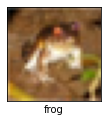

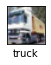

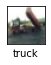

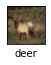

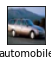

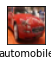

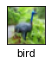

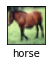

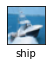

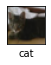

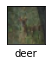

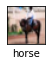

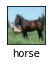

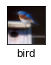

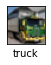

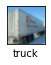

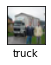

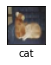

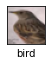

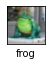

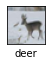

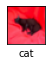

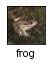

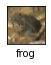

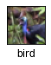

In [3]:
#Verification of data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) #rows=5 , cols=5
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compile and train the model

## Evaluate the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5336 - accuracy: 0.4383 - val_loss: 1.2547 - val_accuracy: 0.5442
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1743 - accuracy: 0.5849 - val_loss: 1.0603 - val_accuracy: 0.6269
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0161 - accuracy: 0.6438 - val_loss: 0.9893 - val_accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9235 - accuracy: 0.6748 - val_loss: 0.9648 - val_accuracy: 0.6641
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8499 - accuracy: 0.7018 - val_loss: 0.9666 - val_accuracy: 0.6594
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7940 - accuracy: 0.7207 - val_loss: 0.8996 - val_accuracy: 0.6877
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7450 - accuracy: 0.7391 - val_loss: 0.8652 - val_accuracy

313/313 - 1s - loss: 0.8364 - accuracy: 0.7165 - 696ms/epoch - 2ms/step


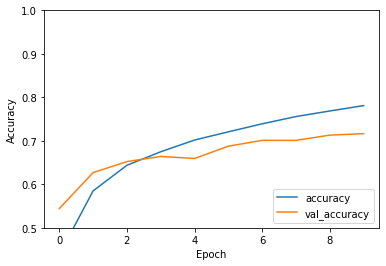

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7164999842643738
